In [5]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups


In [6]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
#definng all the categories 
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#training the dataset 

train = fetch_20newsgroups(subset='train', categories=categories)

test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [8]:
#import necessary packages 

from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline



In [9]:
# creating model based on multinomial NB 

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [10]:
#fit the model 

model.fit(train.data,train.target)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [11]:
#prediction 

predict = model.predict(test.data)


In [12]:
predict

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

In [53]:
#cheak accuracy and se that hoe confuse your answer 

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target , predict)

Text(89.133125, 0.5, 'Predicted')

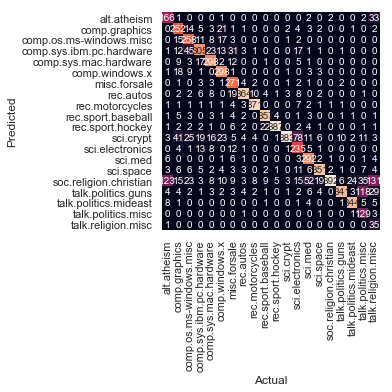

In [37]:
sns.heatmap(mat.T, square=True,annot=True
            , fmt='d', cbar=False,xticklabels=train.target_names
            , yticklabels=train.target_names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [49]:
#predicting cateory on new data based on trained model 
def perdict_category(m):
    pred = model.predict([m])
    matplolireturn train.target_names[pred[0]]0. 

In [50]:
perdict_category('jesus chriest')

'soc.religion.christian'

In [51]:
perdict_category('prme minister of india ')

'talk.politics.mideast'

In [45]:
perdict_category('cricket match between india and pakistan')

'rec.sport.hockey'